<a href="https://colab.research.google.com/github/DevVora15/Cognizant-AI-Program/blob/main/Cognizant_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Cognizant/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
print(df.columns.tolist())

['transaction_id', 'timestamp', 'product_id', 'category', 'customer_type', 'unit_price', 'quantity', 'total', 'payment_type']


In [ ]:
print(df.isnull().sum())

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64


In [ ]:
print(df.dtypes)

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
descriptive_stats = df[numerical_columns].describe()

In [ ]:
print(descriptive_stats)

        unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

# def correlation_plot(data: pd.DataFrame = None):
#   corr = df.corr()
#   corr.style.background_gradient(cmap='coolwarm')

Column: unit_price has 64 unique values

unit_price
3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: count, Length: 64, dtype: int64
Column: quantity has 4 unique values

quantity
1    1979
4    1976
3    1954
2    1920
Name: count, dtype: int64
Column: total has 256 unique values

total
14.97    104
3.99     103
11.97     98
4.99      94
19.96     94
        ... 
60.57      2
47.98      2
17.99      2
20.19      1
35.98      1
Name: count, Length: 256, dtype: int64


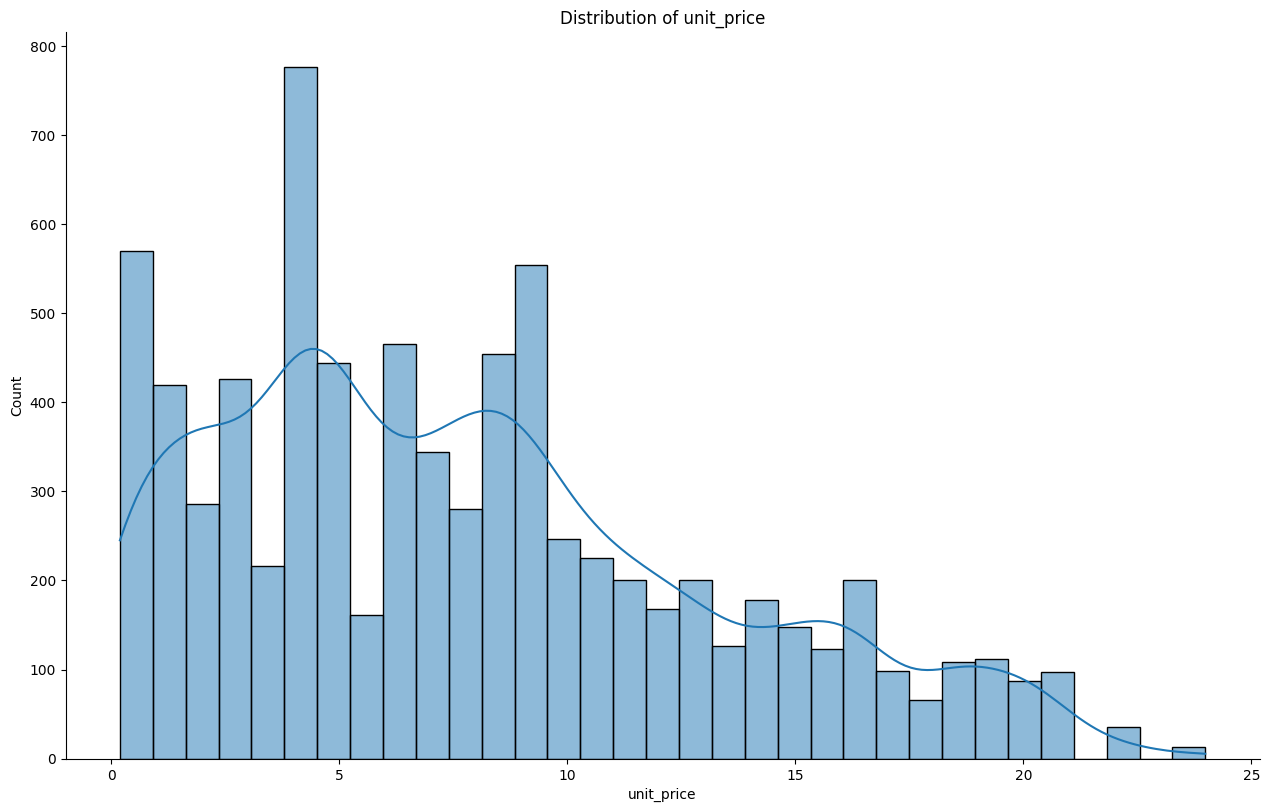

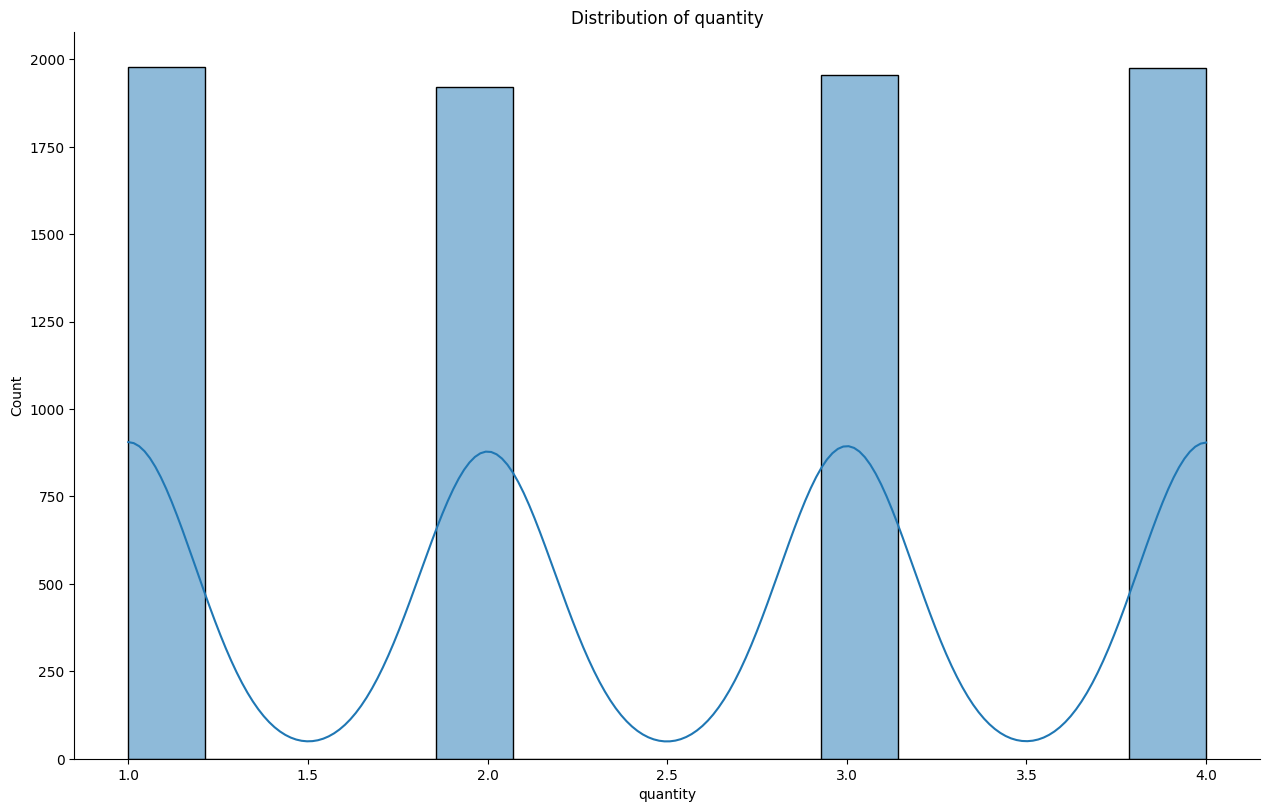

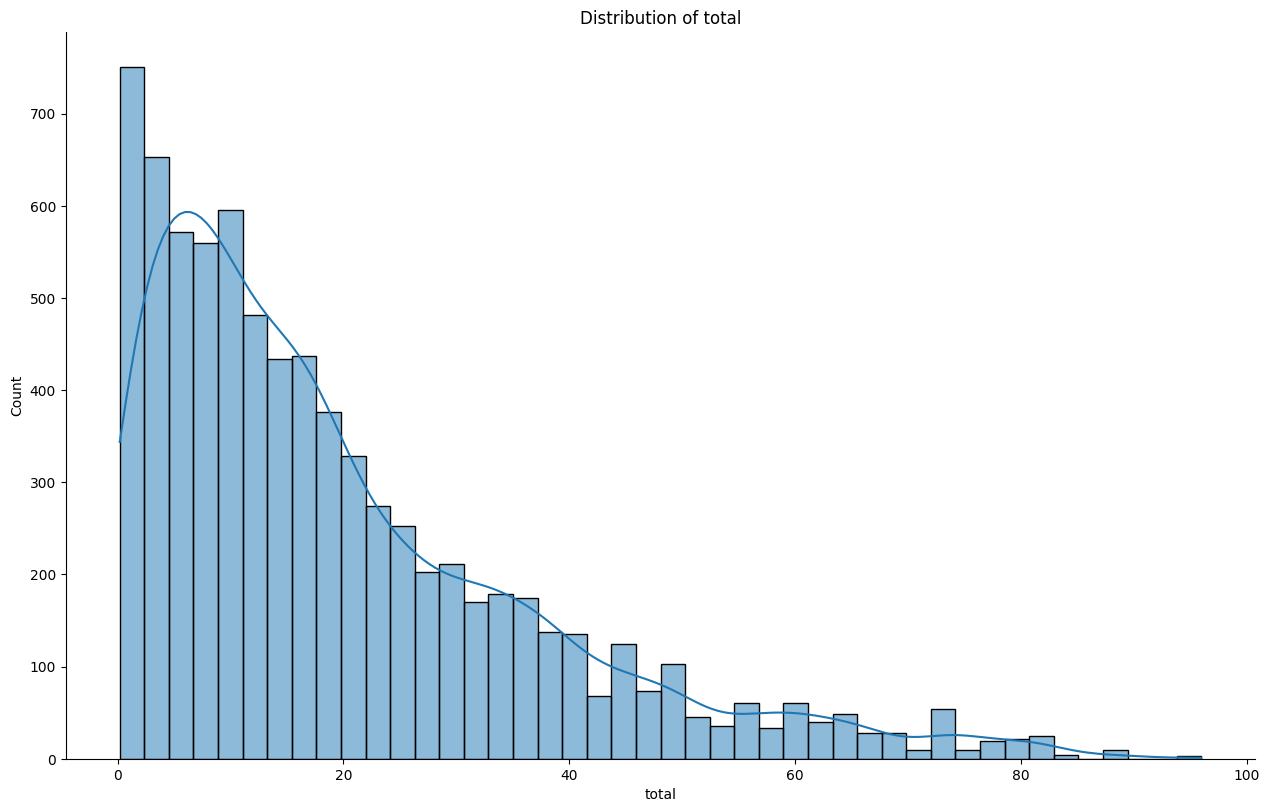

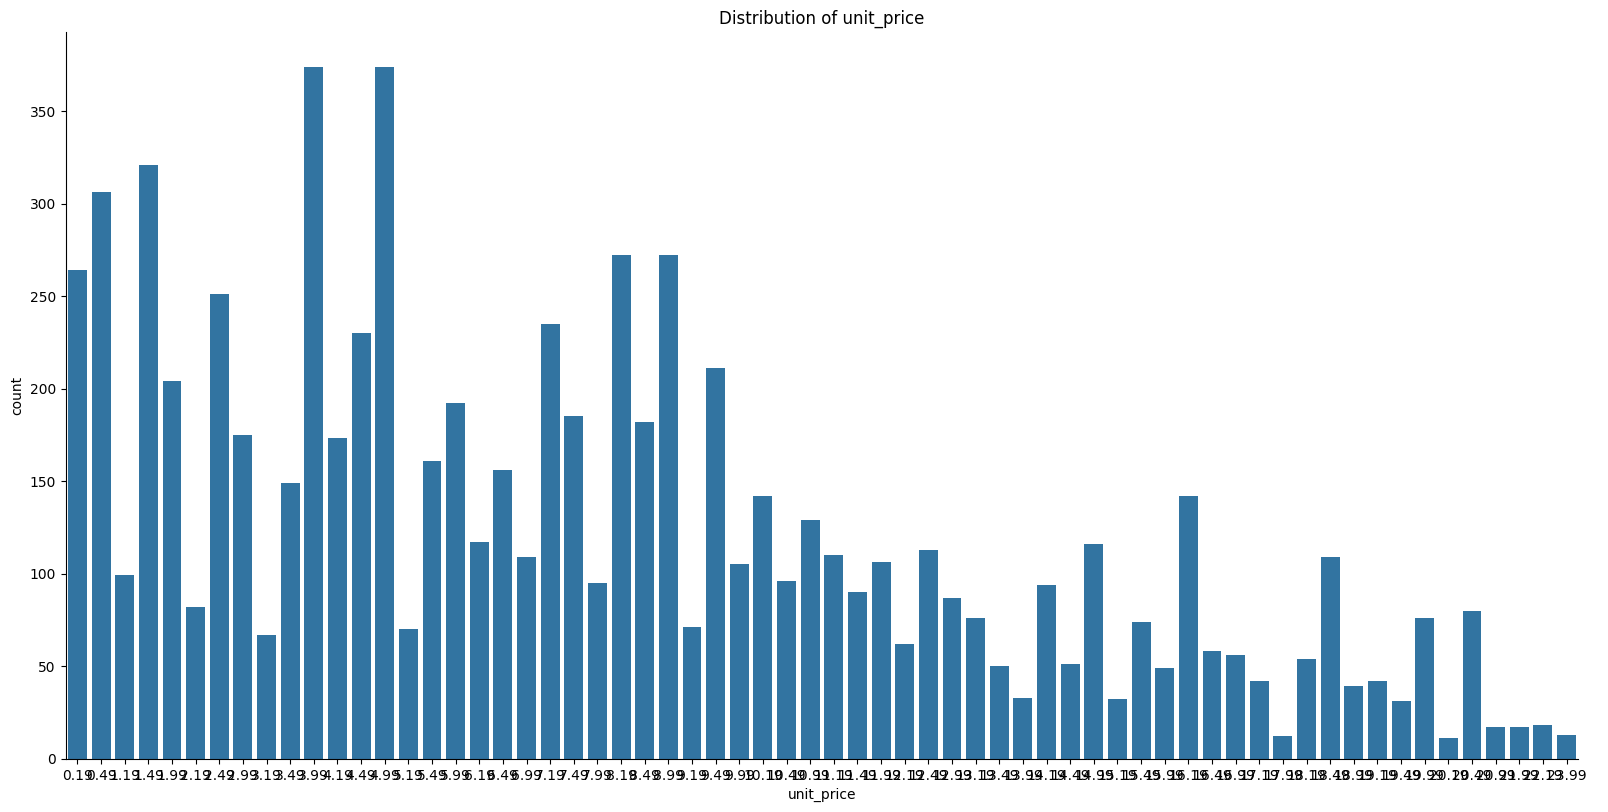

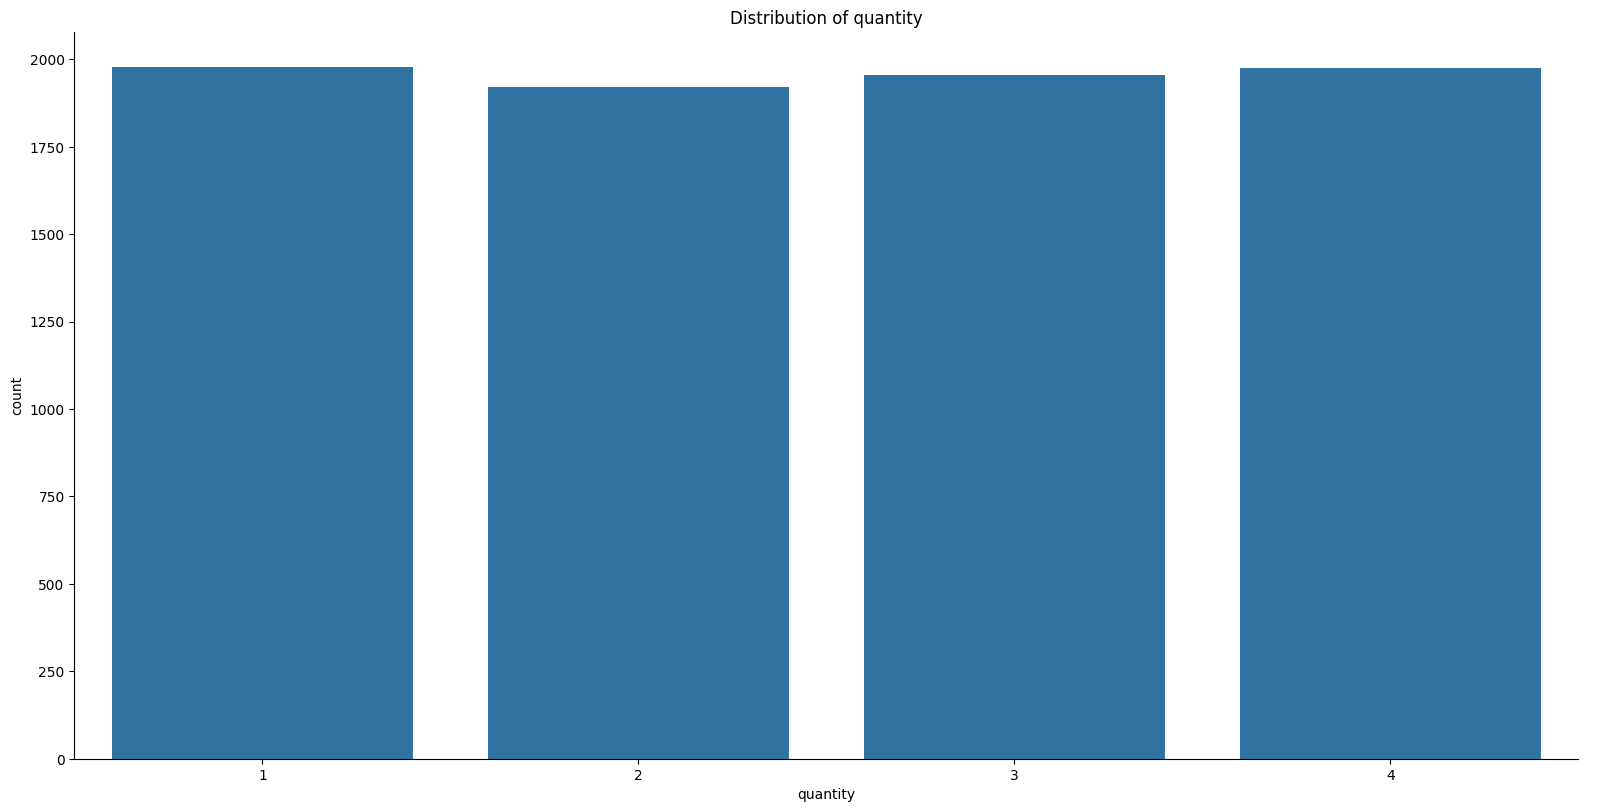

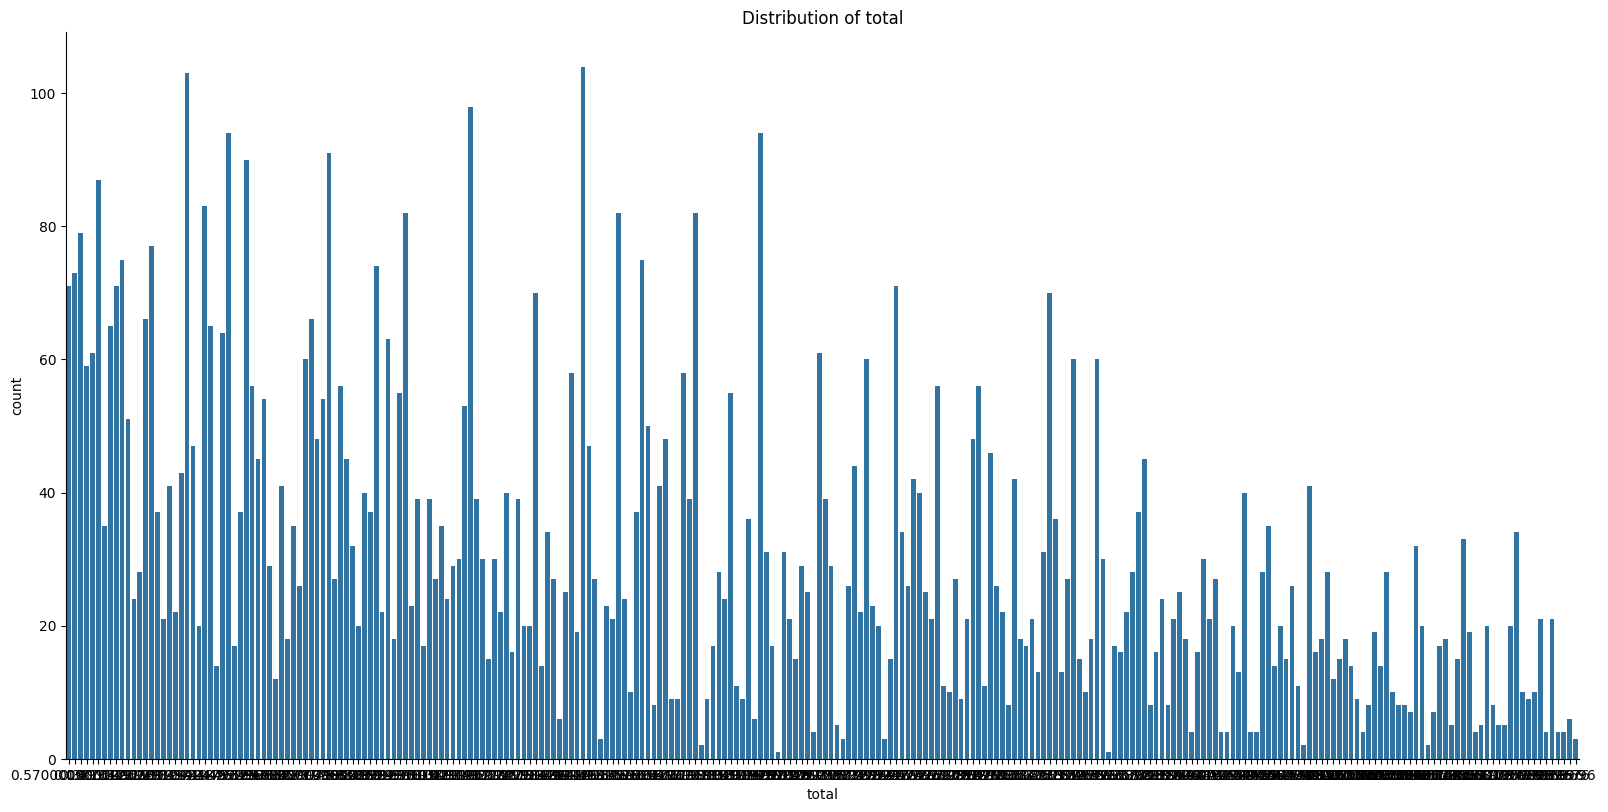

In [ ]:
for col in numerical_columns:
  plot_continuous_distribution(data=df, column=col)
  get_unique_values(data=df, column=col)
for col in numerical_columns:
  plot_categorical_distribution(data=df, column=col)



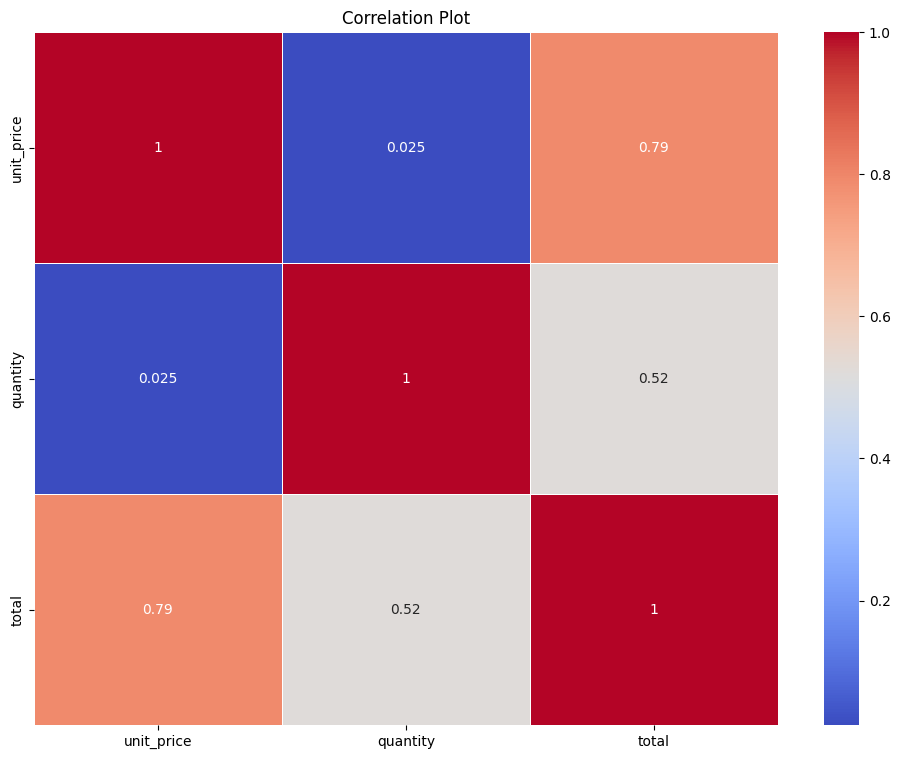

In [ ]:

# Create a new DataFrame with only the numeric columns
df_numeric = df[numerical_columns]

# Calculate the correlation matrix of the numeric columns
correlation_matrix = df_numeric.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm")
plt.title("Correlation Plot")
plt.show()